# Post-COVID Evaluation

In [66]:
import sys
sys.path.append('../')
from src.scoring_functions import *
from src.load_data import *

In [67]:
def add_truth(df, source='icosari', disease='sari', target=False):
    if target:
        df_truth = pd.read_csv(f'https://raw.githubusercontent.com/KITmetricslab/RESPINOW-Hub/main/data/{source}/{disease}/target-{source}-{disease}.csv')
    else:
        df_truth = pd.read_csv(f'https://raw.githubusercontent.com/KITmetricslab/RESPINOW-Hub/main/data/{source}/{disease}/latest_data-{source}-{disease}.csv')
        
    df_truth = df_truth.rename(columns={'value': 'truth'})

    df = df.merge(df_truth, how='left', 
                   left_on=['location', 'age_group', 'target_end_date'], 
                   right_on=['location', 'age_group', 'date'])
    return df

In [68]:
# files = glob.glob(f'../data/post-covid/submissions/**/*.csv', recursive=True)

In [69]:
def load_predictions(period='post-covid', start='2023-12-14', end='2024-09-19', include_median=True, include_truth=True, target=True):
    files = glob.glob(f'../data/{period}/submissions/**/*.csv', recursive=True)
    files = [f for f in files if '/old/' not in f]
    
    dfs = []
    for file in files:
        df_temp = pd.read_csv(file)
        df_temp['model'] = file.split('/')[-1].split('-', 5)[-1][:-4] 
        dfs.append(df_temp)
    df = pd.concat(dfs)
    
    if include_median:
        df = add_median(df)
    if include_truth:
        df = add_truth(df, source='icosari', disease='sari', target=target)

    return df[df.forecast_date.between(start, end)]

In [70]:
df = load_predictions('post-covid')

In [71]:
df.model.unique()

array(['lightgbm2', 'lightgbm', 'tsmixer', 'KIT-MeanEnsemble', 'KIT-hhh4'],
      dtype=object)

In [72]:
# df.value = df.value.round()

In [73]:
# df = df[df.forecast_date != '2023-12-28']

In [74]:
model_names = {
    'KIT-MeanEnsemble' : 'Ensemble',
    'lightgbm2' : 'LightGBM',
    'tsmixer' : 'TSMixer',
    'KIT-hhh4' : 'hhh4'
}

In [75]:
model_colors = {
    "LightGBM": "#B30000",
    "TSMixer": "#E69F00",
    "KIT-frozen_baseline": "#999999",
    "KIT": "#56B4E9",
    "LMU": "#F0E442",
    "Ensemble": "#009E73",
    "MedianEnsemble": "#60D1B3",
    "RIVM": "#80471C",
    "hhh4": "#3C4AAD",
    "SU": "#CC79A7",
    "SZ": "#000000"
}

In [76]:
df.model = df.model.replace(model_names)

In [77]:
df = df[df.model != 'lightgbm']

#### National level

In [49]:
evaluate_models(df, 'national')

,model,spread,overprediction,underprediction,wis,c50,c95
0,Ensemble,377.213995,172.441267,650.415435,1200.070698,0.317073,0.926829
1,LightGBM,389.173967,45.180977,830.436433,1264.791377,0.469512,0.914634
2,TSMixer,420.129774,289.905952,595.242153,1305.277879,0.353659,0.878049
3,hhh4,353.540941,434.439024,789.575784,1577.555749,0.250000,0.725610


In [50]:
evaluate_models(df, 'national', by_horizon=True)

,horizon,model,spread,overprediction,underprediction,wis,c50,c95
0,1,LightGBM,381.579115,102.024372,579.798831,1063.402318,0.487805,0.926829
1,1,Ensemble,362.688042,217.920489,540.219192,1120.827722,0.365854,0.951220
2,1,hhh4,325.574913,372.087108,605.452962,1303.114983,0.365854,0.853659
3,1,TSMixer,435.192689,342.254707,539.849968,1317.297363,0.365854,0.878049
4,2,LightGBM,385.722172,43.564869,749.653378,1178.940419,0.560976,0.902439
5,2,Ensemble,377.760092,213.589604,634.494155,1225.843850,0.317073,0.902439
6,2,TSMixer,429.093005,392.137346,594.444924,1415.675275,0.365854,0.829268
7,2,hhh4,349.756098,471.094077,768.951220,1589.801394,0.243902,0.756098
8,3,Ensemble,386.341584,148.707079,611.711939,1146.760601,0.341463,0.926829
9,3,TSMixer,417.131374,275.364551,522.527407,1215.023333,0.365854,0.902439


#### Age groups

In [51]:
evaluate_models(df, 'age')

,model,spread,overprediction,underprediction,wis,c50,c95
0,Ensemble,84.707510,46.903707,103.294556,234.905773,0.417683,0.909553
1,LightGBM,67.346171,30.987203,157.901964,256.235338,0.318089,0.768293
2,hhh4,103.873403,85.830285,94.195703,283.899390,0.486789,0.908537
3,TSMixer,88.294441,62.071067,140.293788,290.659297,0.340447,0.742886


In [52]:
evaluate_models(df, 'age', by_horizon=True)

,horizon,model,spread,overprediction,underprediction,wis,c50,c95
0,1,LightGBM,66.104469,43.332129,110.566672,220.003270,0.296748,0.821138
1,1,Ensemble,77.522947,49.199387,95.779193,222.501526,0.426829,0.910569
2,1,hhh4,84.239257,62.700929,95.491289,242.431475,0.500000,0.906504
3,1,TSMixer,91.518756,60.136942,129.384315,281.040013,0.414634,0.768293
4,2,Ensemble,83.612081,53.242845,101.736786,238.591712,0.434959,0.918699
5,2,LightGBM,67.703654,35.246287,140.884838,243.834779,0.341463,0.780488
6,2,hhh4,98.466899,86.389663,98.051103,282.907666,0.463415,0.902439
7,2,TSMixer,90.254793,74.640110,136.057211,300.952114,0.341463,0.739837
8,3,Ensemble,87.304990,44.060959,97.088103,228.454052,0.398374,0.910569
9,3,LightGBM,67.296394,23.633713,168.827045,259.757152,0.353659,0.747967


In [146]:
evaluate_models(df, 'age', by_age=True)

,age_group,model,spread,overprediction,underprediction,wis,c50,c95
0,00-04,Ensemble,116.517751,61.313397,65.388073,243.219221,0.530488,0.975610
1,00-04,TSMixer,139.318438,84.592018,49.737851,273.648306,0.554878,0.963415
2,00-04,LightGBM,91.991800,48.446146,133.731883,274.169829,0.439024,0.890244
3,00-04,hhh4,122.412892,118.821429,67.182056,308.416376,0.463415,0.951220
4,05-14,hhh4,71.023519,23.246516,42.856272,137.126307,0.542683,0.951220
5,05-14,Ensemble,42.717750,2.656230,96.638844,142.012825,0.390244,0.878049
6,05-14,LightGBM,26.106109,2.907337,170.634073,199.647519,0.164634,0.585366
7,05-14,TSMixer,31.965813,0.957153,217.358578,250.281543,0.097561,0.451220
8,15-34,hhh4,62.456446,23.533101,64.072300,150.061847,0.548780,0.914634
9,15-34,Ensemble,39.585475,4.657954,119.813625,164.057054,0.195122,0.798780


In [225]:
def compute_scores(df):
    # Apply the scoring function row-wise and round the result to 5 digits
    df_scores = (
        df.assign(score=lambda x: x.apply(lambda row: round(score(row['value'], row['truth'], row['type'], row['quantile']), 5), axis=1))
          .drop(columns=['value', 'truth'])
    )
    return df_scores

In [226]:
scores = compute_scores(df)

In [159]:
# scores[(scores.age_group == '00+') & (scores.type == 'quantile')].groupby('model')['score'].mean()

In [145]:
def evaluate_models(df, level='national', by_horizon=False, by_age=False):
    df_temp = filter_by_level(df, level)
    if by_horizon:
        wis_temp = df_temp.groupby('horizon')[df_temp.columns].apply(compute_wis).reset_index().drop(columns='level_1')
        coverage_temp = df_temp.groupby('horizon')[df_temp.columns].apply(compute_coverage).reset_index().drop(columns='level_1')
        results = wis_temp.merge(coverage_temp, on=['model', 'horizon']).sort_values(['horizon', 'wis'], ignore_index=True)
    elif by_age:
        wis_temp = df_temp.groupby('age_group')[df_temp.columns].apply(compute_wis).reset_index().drop(columns='level_1')
        coverage_temp = df_temp.groupby('age_group')[df_temp.columns].apply(compute_coverage).reset_index().drop(columns='level_1')
        results = wis_temp.merge(coverage_temp, on=['model', 'age_group']).sort_values(['age_group', 'wis'], ignore_index=True)        
    else:
        wis_temp = compute_wis(df_temp)
        coverage_temp = compute_coverage(df_temp)
        results = wis_temp.merge(coverage_temp, on='model').sort_values('wis', ignore_index=True)
    
    return results

In [15]:
df_temp = filter_by_level(df, 'national')

In [26]:
df_temp.groupby('horizon').apply(compute_wis, include_groups=False).reset_index().drop(columns='level_1')

,horizon,model,spread,overprediction,underprediction,wis
0,1,Ensemble,362.688042,217.920489,540.219192,1120.827722
1,1,LightGBM,381.579115,102.024372,579.798831,1063.402318
2,1,TSMixer,435.192689,342.254707,539.849968,1317.297363
3,1,hhh4,325.574913,372.087108,605.452962,1303.114983
4,2,Ensemble,377.760092,213.589604,634.494155,1225.843850
5,2,LightGBM,385.722172,43.564869,749.653378,1178.940419
6,2,TSMixer,429.093005,392.137346,594.444924,1415.675275
7,2,hhh4,349.756098,471.094077,768.951220,1589.801394
8,3,Ensemble,386.341584,148.707079,611.711939,1146.760601
9,3,LightGBM,398.190205,20.753667,887.804702,1306.748575


In [41]:
df_temp.groupby('horizon')[df_temp.columns].apply(compute_coverage).reset_index().drop(columns='level_1')

,horizon,model,c50,c95
0,1,Ensemble,0.365854,0.951220
1,1,LightGBM,0.487805,0.926829
2,1,TSMixer,0.365854,0.878049
3,1,hhh4,0.365854,0.853659
4,2,Ensemble,0.317073,0.902439
5,2,LightGBM,0.560976,0.902439
6,2,TSMixer,0.365854,0.829268
7,2,hhh4,0.243902,0.756098
8,3,Ensemble,0.341463,0.926829
9,3,LightGBM,0.536585,0.926829


In [143]:
df_temp = filter_by_level(df, 'age')

In [144]:
df_temp.groupby('age_group').apply(compute_wis, include_groups=False).reset_index().drop(columns='level_1')

,age_group,model,spread,overprediction,underprediction,wis
0,00-04,Ensemble,116.517751,61.313397,65.388073,243.219221
1,00-04,LightGBM,91.991800,48.446146,133.731883,274.169829
2,00-04,TSMixer,139.318438,84.592018,49.737851,273.648306
3,00-04,hhh4,122.412892,118.821429,67.182056,308.416376
4,05-14,Ensemble,42.717750,2.656230,96.638844,142.012825
5,05-14,LightGBM,26.106109,2.907337,170.634073,199.647519
6,05-14,TSMixer,31.965813,0.957153,217.358578,250.281543
7,05-14,hhh4,71.023519,23.246516,42.856272,137.126307
8,15-34,Ensemble,39.585475,4.657954,119.813625,164.057054
9,15-34,LightGBM,25.427042,2.130482,210.136913,237.694437


# Plots

In [160]:
from plotnine import ggplot, aes, geom_bar, geom_label, scale_alpha_manual, labs, coord_flip, theme_bw, theme, geom_line, scale_alpha_discrete, guide_legend

In [60]:
from plotnine import *

In [162]:
df_national = evaluate_models(df, 'national')

In [163]:
df_age = evaluate_models(df, 'age')

In [164]:
scores_national = pd.melt(df_national, id_vars=['model'], value_vars=['underprediction', 'spread', 'overprediction'], 
                 var_name='penalty', value_name='value')

In [165]:
scores_age = pd.melt(df_age, id_vars=['model'], value_vars=['underprediction', 'spread', 'overprediction'], 
                 var_name='penalty', value_name='value')

In [166]:
desired_order = ['Ensemble', 'LightGBM', 'TSMixer', 'hhh4']
desired_order.reverse()

# Convert 'model' column to a categorical type with the specified order in both DataFrames
df_national['model'] = pd.Categorical(df_national['model'], categories=desired_order, ordered=True)
scores_national['model'] = pd.Categorical(scores_national['model'], categories=desired_order, ordered=True)

df_age['model'] = pd.Categorical(df_age['model'], categories=desired_order, ordered=True)
scores_age['model'] = pd.Categorical(scores_age['model'], categories=desired_order, ordered=True)

In [167]:
#df_national['model'] = pd.Categorical(df_national['model'], categories=['Ensemble', 'LightGBM', 'TSMixer', 'hhh4'].reverse(), ordered=True)

In [168]:
#scores_national = scores_national.sort_values('model', ascending=False, ignore_index=True)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


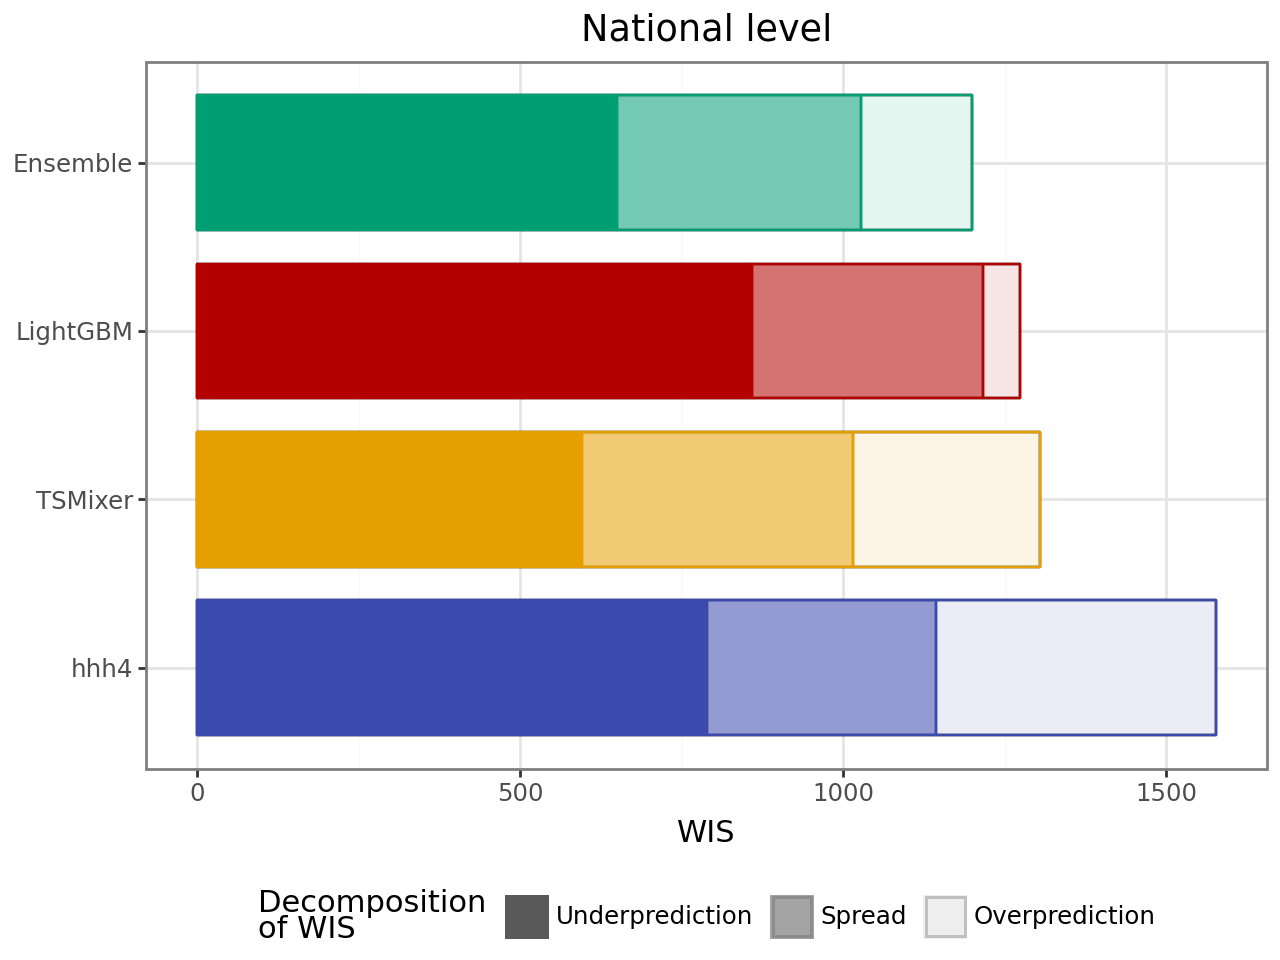

In [169]:
p = (ggplot()
    + geom_bar(df_national, aes(x='model', y='wis'), fill='white', color='black', stat='identity', width=0.8)
    + geom_bar(scores_national, aes(x='model', y='value', fill='model', alpha='penalty', color='model'), stat='identity', width=0.8,
               show_legend={'color': False,
                            'fill': False,
                            'alpha': True})
    + scale_color_manual(values=model_colors)
    + scale_fill_manual(values=model_colors)
    + scale_alpha_discrete(labels=["Overprediction", "Spread", "Underprediction"], guide=guide_legend(reverse=True))
    + labs(x="", y="WIS", color="Model", alpha="Decomposition\nof WIS", title="National level")
    + coord_flip()
    + theme_bw()
    + theme(legend_position='bottom',
            legend_title=element_text(ha='center'))
   )
p

In [170]:
p.save("../figures/wis_national.pdf", width = 150, height = 90, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 150.0 x 90.00000000000001 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/wis_national.pdf


/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


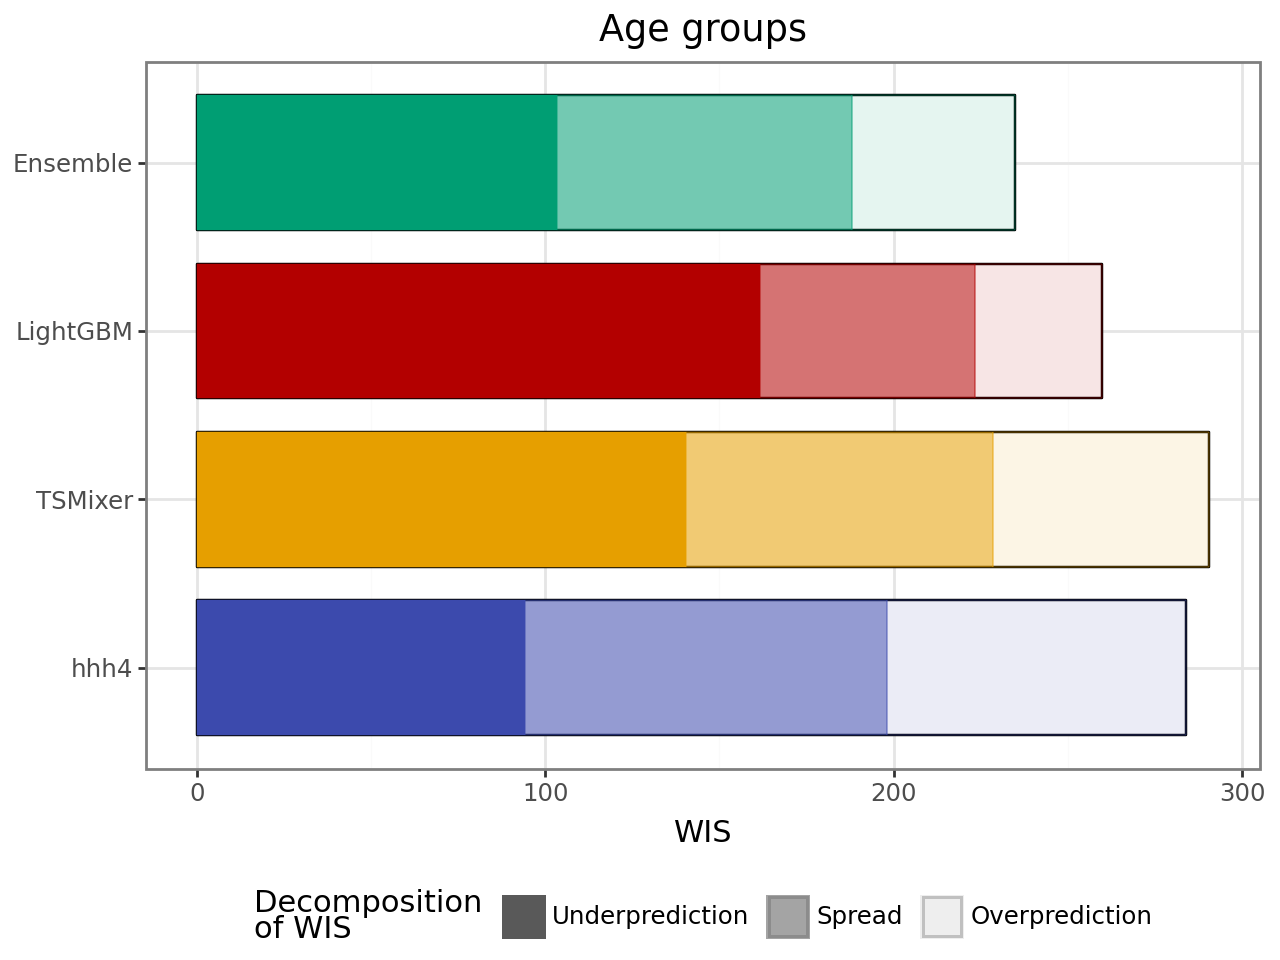

In [171]:
p = (ggplot()
    + geom_bar(df_age, aes(x='model', y='wis'), fill='white', color='black', stat='identity', width=0.8)
    + geom_bar(scores_age, aes(x='model', y='value', fill='model', alpha='penalty', color='model'), size=0.1, stat='identity', width=0.8, 
               show_legend={'color': False,
                            'fill': False,
                            'alpha': True})
    + scale_color_manual(values=model_colors)
    + scale_fill_manual(values=model_colors)
    + scale_alpha_discrete(labels=["Overprediction", "Spread", "Underprediction"], guide=guide_legend(reverse=True))
    + labs(x="", y="WIS", color="Model", alpha="Decomposition\nof WIS", title="Age groups")
    + coord_flip()
    + theme_bw()
    + theme(legend_position='bottom')
   )
p

In [172]:
p.save("../figures/wis_age_mean.pdf", width = 150, height = 90, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 150.0 x 90.00000000000001 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/wis_age_mean.pdf


In [55]:
df_national = evaluate_models(df, 'national')
df_age = evaluate_models(df, 'age')

In [56]:
df_wide = pd.concat([
    df_national.assign(level='national'),
    df_age.assign(level='age')],
    ignore_index=True)

In [57]:
df = pd.melt(df_wide, id_vars=['level', 'model'], value_vars=['wis', 'underprediction', 'spread', 'overprediction'], 
                 var_name='metric', value_name='value')

In [58]:
df['level'] = pd.Categorical(df['level'], categories=['national', 'age'], ordered=True)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


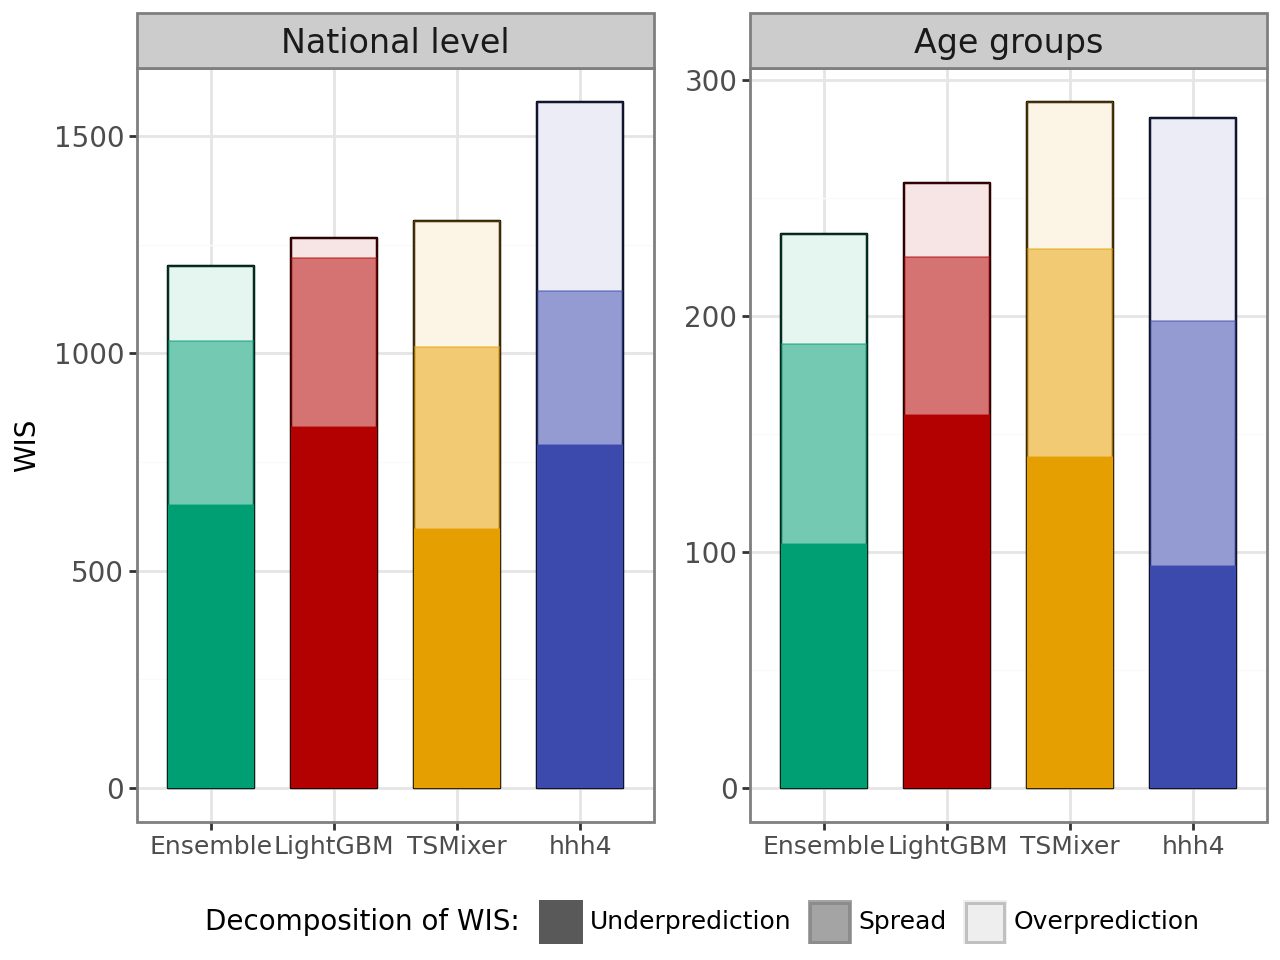

In [61]:
p = (ggplot()
    + facet_wrap('~level', nrow=1, scales='free_y', labeller=lambda x: ('National level' if x == 'national' else 'Age groups'))
    + geom_bar(df[df.metric == 'wis'], aes(x='model', y='value'), fill='white', color='black', stat='identity', width=0.7)
    + geom_bar(df[df.metric != 'wis'], aes(x='model', y='value', fill='model', alpha='metric', color='model'), size=0.1, stat='identity', width=0.7, 
               show_legend={'color': False,
                            'fill': False,
                            'alpha': True})
    + scale_color_manual(values=model_colors)
    + scale_fill_manual(values=model_colors)
    + scale_alpha_discrete(labels=["Overprediction", "Spread", "Underprediction"], guide=guide_legend(reverse=True))
    + labs(x="", y="WIS", color="Model", alpha="Decomposition of WIS:", title="")
    #+ coord_flip()
    + theme_bw()
    + theme(legend_position='bottom',
            legend_title_position='left',
            strip_text=element_text(size=12),             # Facet title text size
            legend_title=element_text(size=10),           # Legend title text size
            legend_text=element_text(size=9),             # Legend item text size
            axis_text_x=element_text(size=9),               # Axis text (tick labels) size
            axis_text_y=element_text(size=10),
            axis_title=element_text(size=10),             # Axis title text size
            plot_title=element_text(size=14))              # Plot title text size)
   )
p

In [179]:
p.save("../figures/wis.pdf", width = 160, height = 80, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 160.0 x 80.0 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/wis.pdf


In [227]:
from plotnine import *
import matplotlib.pyplot as plt

In [242]:
scores

,location,age_group,forecast_date,target_end_date,horizon,type,quantile,model,year,week,date,score
9408,DE,00+,2024-04-11,2024-04-14,1,quantile,0.025,LightGBM,2024.0,15.0,2024-04-14,167.92324
9409,DE,00+,2024-04-11,2024-04-14,1,quantile,0.100,LightGBM,2024.0,15.0,2024-04-14,410.74175
9410,DE,00+,2024-04-11,2024-04-14,1,quantile,0.250,LightGBM,2024.0,15.0,2024-04-14,752.30481
9411,DE,00+,2024-04-11,2024-04-14,1,quantile,0.500,LightGBM,2024.0,15.0,2024-04-14,1183.62674
9412,DE,00+,2024-04-11,2024-04-14,1,quantile,0.750,LightGBM,2024.0,15.0,2024-04-14,253.49998
...,...,...,...,...,...,...,...,...,...,...,...,...
53131,DE,60-79,2023-12-14,2024-01-07,4,median,0.500,hhh4,2024.0,1.0,2024-01-07,100.00000
53132,DE,80+,2023-12-14,2023-12-17,1,median,0.500,hhh4,2023.0,50.0,2023-12-17,74.00000
53133,DE,80+,2023-12-14,2023-12-24,2,median,0.500,hhh4,2023.0,51.0,2023-12-24,765.00000
53134,DE,80+,2023-12-14,2023-12-31,3,median,0.500,hhh4,2023.0,52.0,2023-12-31,359.00000


In [228]:
def filter_scores(df, type="quantile", level="national", by_horizon=False, average=True):
    # Filter by type
    df = df[df['type'] == type]

    # Filter by level
    if level == "national":
        df = df[(df['location'] == "DE") & (df['age_group'] == "00+")]
    elif level == "states":
        df = df[(df['location'] != "DE")]
    elif level == "age":
        df = df[(df['location'] == "DE") & (df['age_group'] != "00+")]
                
    if by_horizon:
        if average:
            df = df.groupby(['model', 'horizon'], as_index=False).agg(score=('score', 'mean'))
            df = df.sort_values(by=['model', 'horizon'])
    else:
        if average:
            df = df.groupby(['model'], as_index=False).agg(score=('score', 'mean'))
        else:
            df = df.groupby(['model', 'location', 'age_group'], as_index=False).agg(score=('score', 'mean'))

    return df

In [229]:
def plot_scores_by_horizon(scores, level='national'):
    
    scores = filter_scores(scores, type='quantile', level=level, by_horizon=True, average=True)
    
    ylabel = "Mean WIS"

    plot = (
        ggplot(scores, aes(x='horizon', y='score', color='model')) +
        geom_line(size=1) +
        labs(
            x="Horizon (days)",
            y=ylabel,
            color="Model"
        ) +
        #scale_x_continuous(breaks=[i * -5 for i in range(6)], minor_breaks=range(-28, 1)) +
        scale_y_continuous(limits=(0, None)) +
        theme_bw() +
        theme(legend_position="right")
    )

    return plot

In [230]:
scores = compute_scores(df)

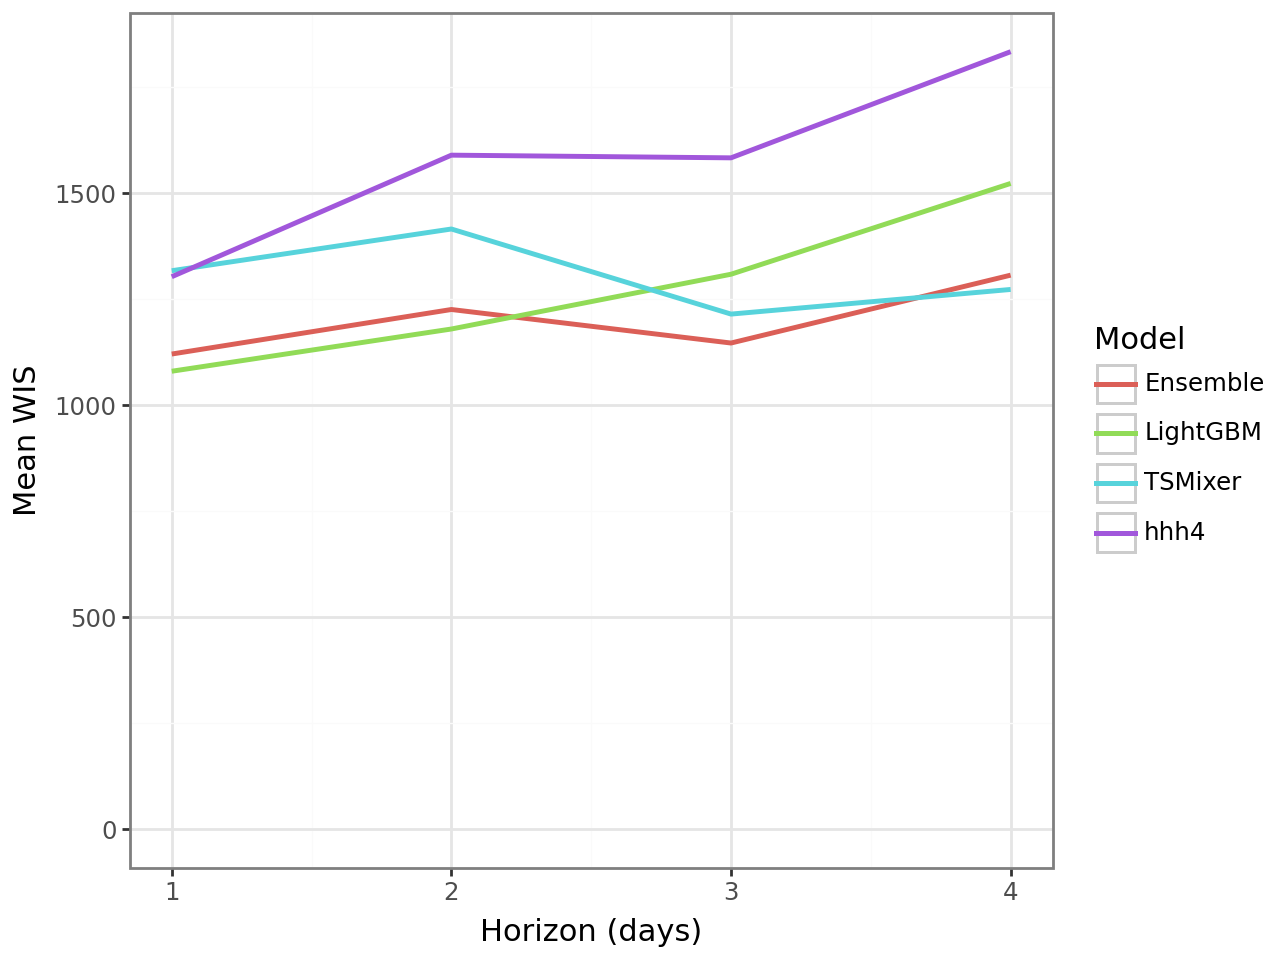

In [231]:
plot_scores_by_horizon(scores)

In [115]:
desired_order.reverse()

In [232]:
desired_order

['hhh4', 'TSMixer', 'LightGBM', 'Ensemble']

In [100]:
df_national = evaluate_models(df, 'national', by_horizon=True)
df_age = evaluate_models(df, 'age', by_horizon=True)

In [101]:
df_wide = pd.concat([
    df_national.assign(level='national'),
    df_age.assign(level='age')],
    ignore_index=True)

In [102]:
df_long = pd.melt(df_wide, id_vars=['level', 'horizon', 'model'], value_vars=['wis', 'underprediction', 'spread', 'overprediction'], 
                 var_name='metric', value_name='value')

df_long['level'] = pd.Categorical(df_long['level'], categories=['national', 'age'], ordered=True)

In [104]:
df_long

,level,horizon,model,metric,value
0,national,1,LightGBM,wis,1063.402318
1,national,1,Ensemble,wis,1120.827722
2,national,1,hhh4,wis,1303.114983
3,national,1,TSMixer,wis,1317.297363
4,national,2,LightGBM,wis,1178.940419
...,...,...,...,...,...
123,age,3,hhh4,overprediction,90.668990
124,age,4,Ensemble,overprediction,41.111639
125,age,4,TSMixer,overprediction,49.116799
126,age,4,LightGBM,overprediction,21.736685


In [109]:
df_long[df_long.level=='national']

,level,horizon,model,metric,value
0,national,1,LightGBM,wis,1063.402318
1,national,1,Ensemble,wis,1120.827722
2,national,1,hhh4,wis,1303.114983
3,national,1,TSMixer,wis,1317.297363
4,national,2,LightGBM,wis,1178.940419
...,...,...,...,...,...
107,national,3,hhh4,overprediction,429.494774
108,national,4,TSMixer,overprediction,149.867203
109,national,4,Ensemble,overprediction,109.547897
110,national,4,LightGBM,overprediction,14.380999


In [ ]:
def plot_scores_by_horizon_and_model(scores, level='national'):
    scores = filter_scores(scores, type='quantile', level=level, by_horizon=True, average=True)
    
    desired_order = ['Ensemble', 'LightGBM', 'TSMixer', 'hhh4']
    scores['model'] = pd.Categorical(scores['model'], categories=desired_order, ordered=True) 
    
    plot = (
        ggplot(scores, aes(x='model', y='score', fill='model')) 
        + geom_bar(stat='identity', position='dodge', width=0.7)
        + scale_color_manual(values=model_colors)
        + scale_fill_manual(values=model_colors)
        + labs(
            x="",
            y="WIS",
            title="National level" if (level=='national') else "Age groups"
        )
        + facet_grid(cols='horizon', labeller=lambda x: 'Horizon: ' + str(x))  # Create a facet for each horizon
        # + facet_wrap('~horizon', nrow=4, labeller=lambda x: 'Horizon: ' + str(x))  # Create a facet for each horizon
        + theme_bw()
        + theme(legend_position='none',
            legend_title_position='left',
            strip_text=element_text(size=12),             # Facet title text size
            legend_title=element_text(size=10),           # Legend title text size
            legend_text=element_text(size=9),             # Legend item text size
            axis_text_x=element_text(size=10, rotation=90, ha="center"),               # Axis text (tick labels) size
            axis_text_y=element_text(size=9),
            axis_title=element_text(size=10),             # Axis title text size
            plot_title=element_text(size=14)              # Plot title text size)
       )
        #+ coord_flip()
    )
    
    return plot

In [137]:
def plot_scores_by_horizon_and_model(df, level='national'):
    scores = df[df.level==level].copy()
    
    desired_order = ['Ensemble', 'LightGBM', 'TSMixer', 'hhh4']
    scores['model'] = pd.Categorical(scores['model'], categories=desired_order, ordered=True) 
    
    plot = (
        ggplot() 
        + geom_bar(scores[scores.metric == 'wis'], aes(x='model', y='value', color='model'), fill='white', stat='identity', width=0.7,
                   show_legend=False)
        + geom_bar(scores[scores.metric != 'wis'], aes(x='model', y='value', fill='model', alpha='metric'), size=0.1, stat='identity', width=0.7, 
                   show_legend={'color': False,
                                'fill': False,
                                'alpha': True})
        + scale_color_manual(values=model_colors)
        + scale_fill_manual(values=model_colors)
        + scale_alpha_discrete(labels=["Overprediction", "Spread", "Underprediction"], guide=guide_legend(reverse=False))
        + labs(x="", y="WIS", color="Model", alpha="Decomposition\nof WIS:", title="")
        + facet_grid(cols='horizon', labeller=lambda x: 'Horizon: ' + str(x))  # Create a facet for each horizon
        # + facet_wrap('~horizon', nrow=4, labeller=lambda x: 'Horizon: ' + str(x))  # Create a facet for each horizon
        + theme_bw()
        + theme(legend_position='right',
            legend_title_position='top',
            strip_text=element_text(size=10),             # Facet title text size
            legend_title=element_text(size=9),           # Legend title text size
            legend_text=element_text(size=8),             # Legend item text size
            axis_text_x=element_text(size=9, rotation=90, ha="center"),               # Axis text (tick labels) size
            axis_text_y=element_text(size=9),
            axis_title=element_text(size=10),             # Axis title text size
            plot_title=element_text(size=14)              # Plot title text size)
       )
        #+ coord_flip()
    )
    
    return plot

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


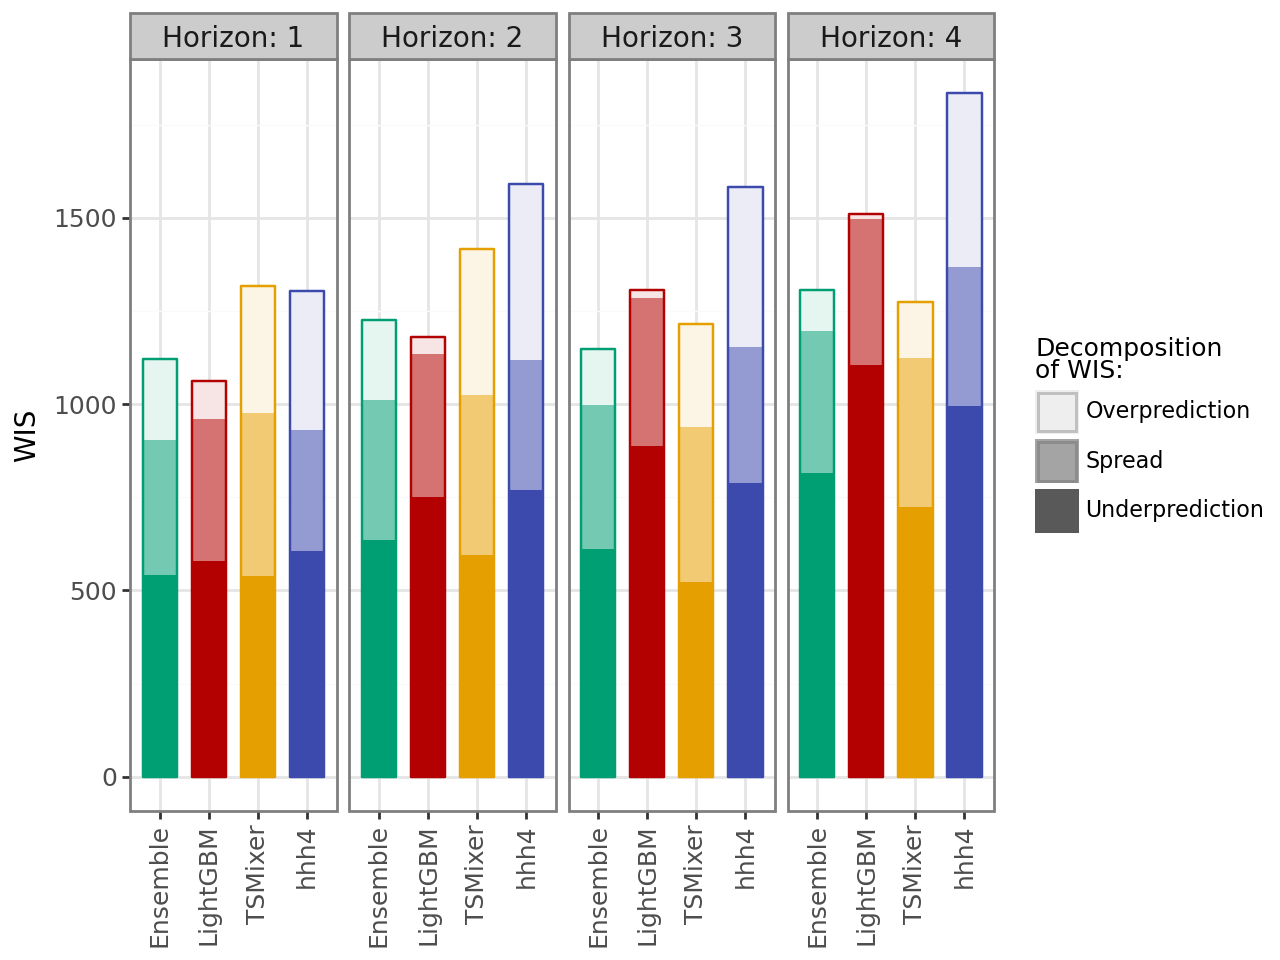

In [138]:
p = plot_scores_by_horizon_and_model(df_long, 'national')
p

In [139]:
p.save("../figures/wis_national_horizon.pdf", width = 160, height = 80, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 160.0 x 80.0 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/wis_national_horizon.pdf


/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


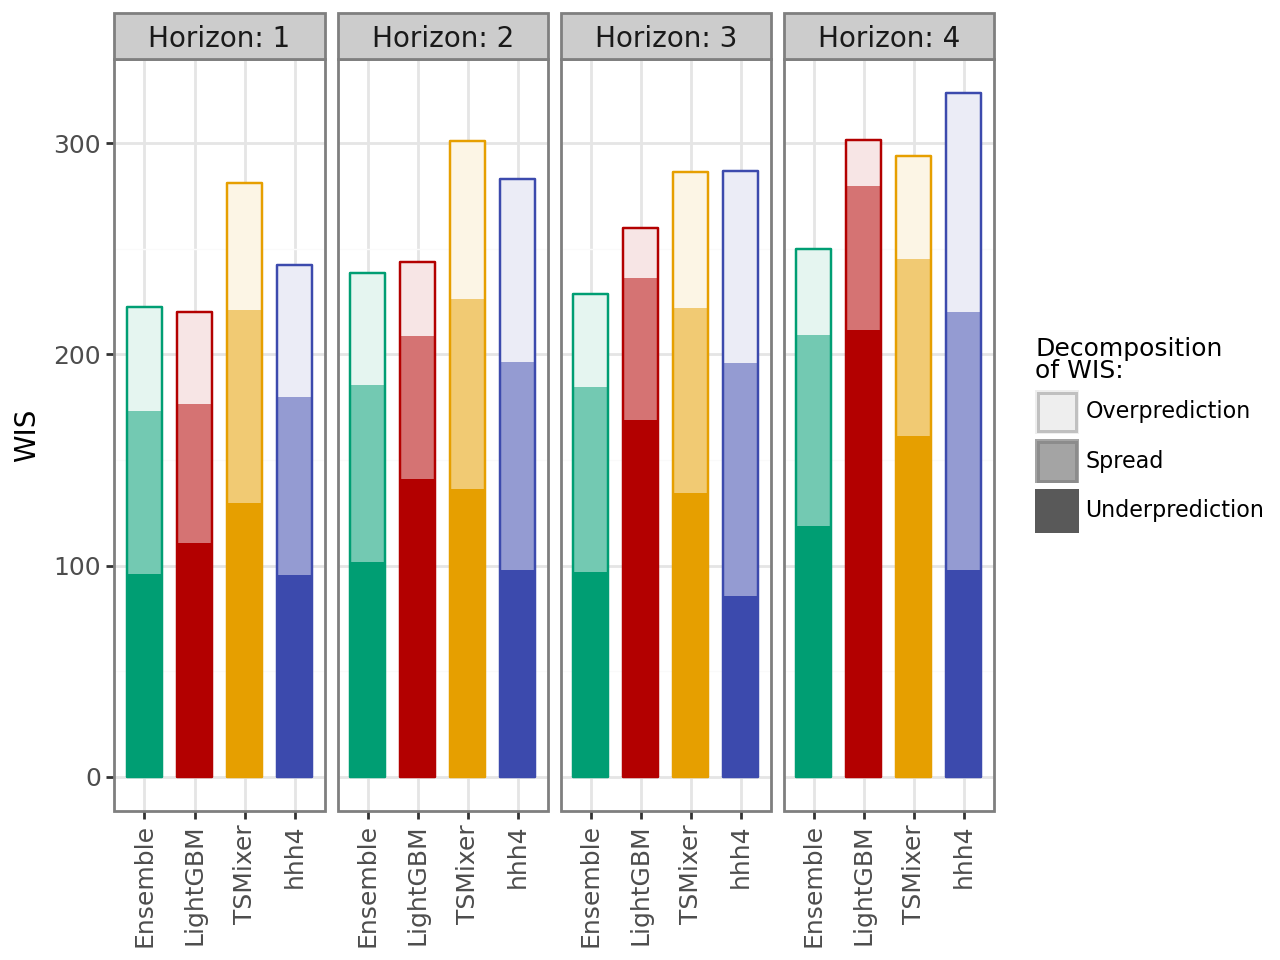

In [140]:
p = plot_scores_by_horizon_and_model(df_long, level='age')
p

In [141]:
p.save("../figures/wis_age_horizon.pdf", width = 160, height = 80, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 160.0 x 80.0 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/wis_age_horizon.pdf


In [54]:
scores_age = filter_scores(scores, type='quantile', level='age', by_horizon=False, average=False)

In [157]:
scores_age = evaluate_models(df, 'age', by_age=True)

In [158]:
scores_age = pd.melt(scores_age, id_vars=['age_group', 'model'], value_vars=['wis', 'underprediction', 'spread', 'overprediction'], 
                 var_name='metric', value_name='value')

In [159]:
def plot_scores_by_age_group(df):
    desired_order = ['Ensemble', 'LightGBM', 'TSMixer', 'hhh4']
    df['model'] = pd.Categorical(df['model'], categories=desired_order, ordered=True) 
    
    plot = (
        ggplot(df, aes(x='model', y='value', fill='model')) +
        geom_bar(stat='identity', position='dodge') +
        labs(
            x="",
            y="WIS",
            title="WIS by age group"
        ) +
        facet_wrap('~age_group') +
        theme_bw() +
        theme(
            axis_text_x=element_text(rotation=45, ha="right"),
            legend_position='none'
        )
    )
    return plot

In [161]:
def plot_scores_by_age_group(scores):
    desired_order = ['Ensemble', 'LightGBM', 'TSMixer', 'hhh4']
    scores['model'] = pd.Categorical(scores['model'], categories=desired_order, ordered=True) 
    
    plot = (
        ggplot() 
        + geom_bar(scores[scores.metric == 'wis'], aes(x='model', y='value', color='model'), fill='white', stat='identity', width=0.7,
                   show_legend=False)
        + geom_bar(scores[scores.metric != 'wis'], aes(x='model', y='value', fill='model', alpha='metric'), size=0.1, stat='identity', width=0.7, 
                   show_legend={'color': False,
                                'fill': False,
                                'alpha': True})
        + scale_color_manual(values=model_colors)
        + scale_fill_manual(values=model_colors)
        + scale_alpha_discrete(labels=["Overprediction", "Spread", "Underprediction"], guide=guide_legend(reverse=False))
        + labs(x="", y="WIS", color="Model", alpha="Decomposition\nof WIS:", title="")
        + facet_wrap('~age_group')
        + theme_bw()
        + theme(legend_position='right',
            legend_title_position='top',
            strip_text=element_text(size=10),             # Facet title text size
            legend_title=element_text(size=9),           # Legend title text size
            legend_text=element_text(size=8),             # Legend item text size
            axis_text_x=element_text(size=9, rotation=90, ha="center"),               # Axis text (tick labels) size
            axis_text_y=element_text(size=9),
            axis_title=element_text(size=10),             # Axis title text size
            plot_title=element_text(size=14)              # Plot title text size)
       )
        #+ coord_flip()
    )
    
    return plot

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/scales/scale_alpha.py:76: PlotnineWarning: Using alpha for a discrete variable is not advised.


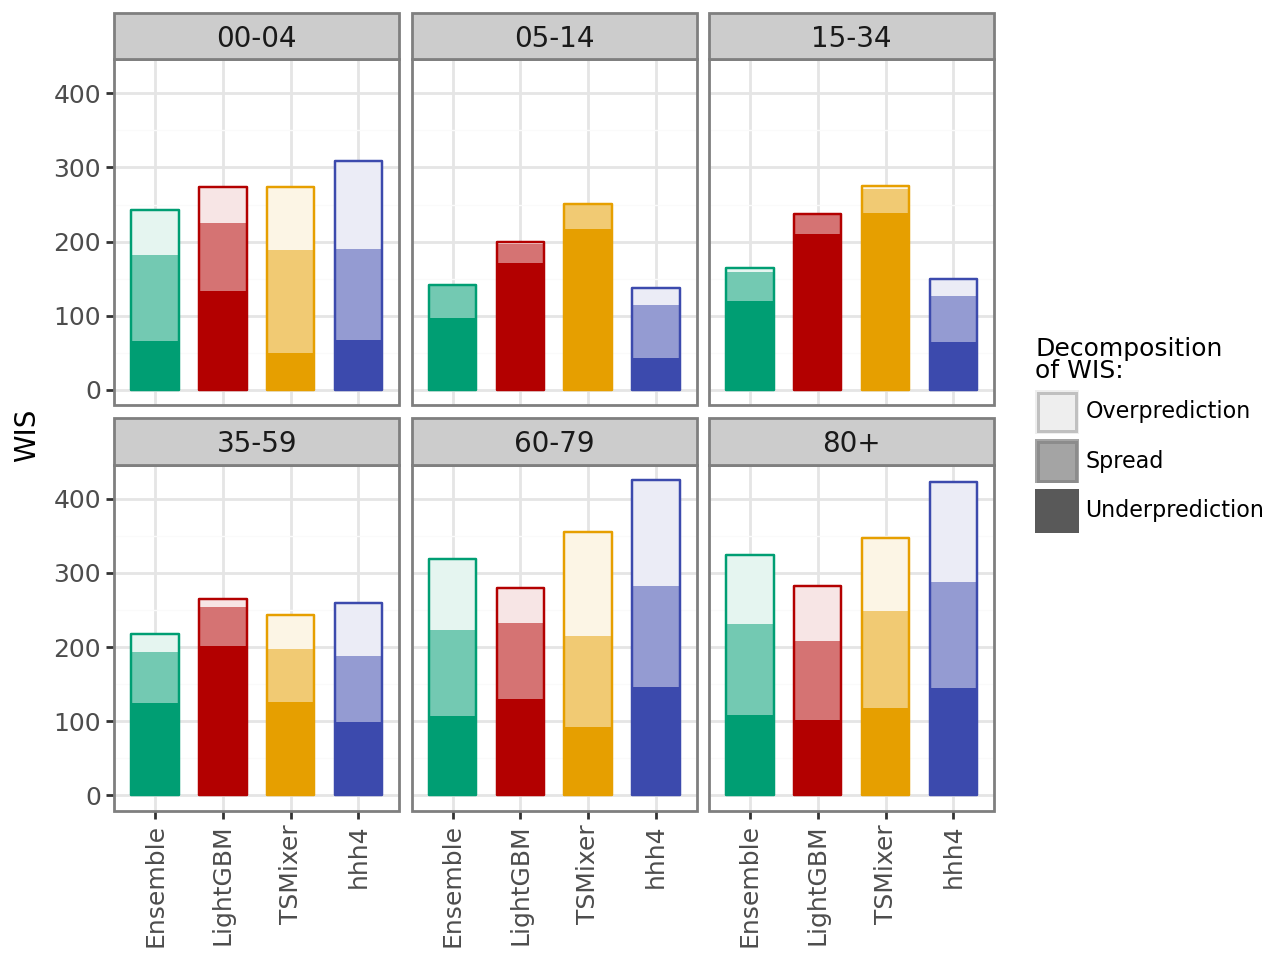

In [162]:
p = plot_scores_by_age_group(scores_age)
p

In [163]:
p.save("../figures/wis_age.pdf", width = 160, height = 110, units="mm", dpi=600)

/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 160.0 x 110.00000000000001 mm image.
/home/wolffram/.conda/envs/RESPINOW-ML/lib/python3.9/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../figures/wis_age.pdf
